<a href="https://colab.research.google.com/github/faruk17035/Deep-Learning-Models/blob/main/LSTM_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
import pandas as pd
from pandas import read_excel
file = '/content/gdrive/MyDrive/Gloveallghor.csv' 
df = pd.read_csv(file)
print(df)

          tpc0      tpc1      tpc2  ...    tpc510    tpc511  Target
0    -0.000004 -0.026288  0.057258  ...  0.122821 -0.076334       0
1    -0.052125  0.002777  0.055245  ...  0.113405 -0.034552       1
2    -0.036938 -0.040373  0.074364  ...  0.150060 -0.062847       0
3    -0.007257 -0.031773  0.035037  ...  0.123129 -0.058323       0
4     0.035118 -0.039462  0.075805  ...  0.136574 -0.083851       1
...        ...       ...       ...  ...       ...       ...     ...
2099 -0.024084 -0.038977  0.045345  ...  0.133063 -0.077309       1
2100 -0.040395 -0.015846  0.046104  ...  0.128894 -0.050292       1
2101 -0.021230 -0.021154  0.059532  ...  0.119205 -0.055102       1
2102 -0.011558 -0.019526  0.055057  ...  0.153210 -0.068933       1
2103 -0.048000 -0.024602  0.039493  ...  0.124544 -0.066235       1

[2104 rows x 513 columns]


In [27]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [28]:
X_train.shape

(1683, 512)

In [29]:
X_test.shape

(421, 512)

In [30]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
#from hyperas.distributions import uniform

from keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

import os

In [31]:
## Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [36]:
def build_model():

  opt = Adam(lr=0.00001)

  model = Sequential()
  model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  model.add(LSTM(units = 128, return_sequences = True))
  model.add(Dropout(0.2))
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

model_lstm=build_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
X_train = X_train.reshape(1683, 512,1)
X_test = X_test.reshape(421, 512, 1)

In [39]:
#es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
#es = EarlyStopping(monitor='val_loss')
history_lstm = model_lstm.fit(X_train, y_train, epochs=10,batch_size=300,validation_data=(X_test,y_test))

Epoch 1/10
6/6 [==============================] - 3s 436ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 2/10
6/6 [==============================] - 3s 428ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 3/10
6/6 [==============================] - 3s 429ms/step - loss: 0.6933 - accuracy: 0.4884 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 4/10
6/6 [==============================] - 3s 425ms/step - loss: 0.6931 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 5/10
6/6 [==============================] - 3s 427ms/step - loss: 0.6929 - accuracy: 0.5181 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 6/10
6/6 [==============================] - 3s 427ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 7/10
6/6 [==============================] - 3s 433ms/step - loss: 0.6930 - accuracy: 0.5187 - val_loss: 0.6931 - val_accuracy: 0.4941
Epoch 8/10
6/6 [====

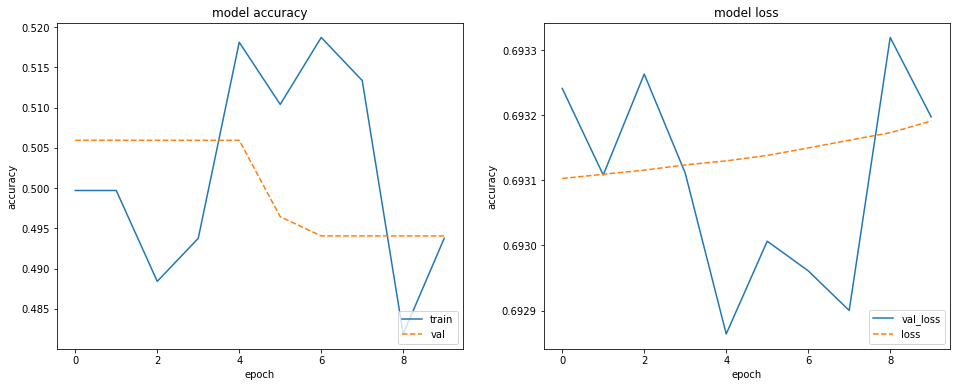

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))
axes[0].plot(history_lstm.history['accuracy'])
axes[0].plot(history_lstm.history['val_accuracy'],'--')
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'val'], loc='lower right')

axes[1].plot(history_lstm.history['loss'])
axes[1].plot(history_lstm.history['val_loss'],"--")
axes[1].set_title('model loss')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['val_loss', 'loss'], loc='lower right')